<a href="https://colab.research.google.com/github/AnhVietPham/Deep-Learning/blob/main/DLTensorflow/automatic_diff/Automatic_differentiation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

# Introduction to gradients and automatic differentiation

In [3]:
a = tf.Variable(3.0)
with tf.GradientTape() as tape:
  y = a**2

In [4]:
# dy = 2x*dx
dy_dx = tape.gradient(y, a)
print(dy_dx)
print()
print(2*a)
print()
dy_dx == 2 * a

tf.Tensor(6.0, shape=(), dtype=float32)

tf.Tensor(6.0, shape=(), dtype=float32)



<tf.Tensor: shape=(), dtype=bool, numpy=True>

In [5]:
w = tf.Variable(tf.random.normal((3,2)), name = 'w')
print(w)
print()
b = tf.Variable(tf.zeros(2, dtype=tf.float32), name='b')
print(b)
print()
x = [[1.,2.,3.]]
print(x)

<tf.Variable 'w:0' shape=(3, 2) dtype=float32, numpy=
array([[-0.553589  , -0.6523832 ],
       [-0.7235144 , -2.573412  ],
       [-0.4539699 ,  0.81325096]], dtype=float32)>

<tf.Variable 'b:0' shape=(2,) dtype=float32, numpy=array([0., 0.], dtype=float32)>

[[1.0, 2.0, 3.0]]


In [6]:
with tf.GradientTape(persistent=True) as tape:
  y = x@w+b
  loss = tf.reduce_mean(y**2)

In [7]:
[dl_dw, dl_db] = tape.gradient(loss, [w, b])

In [8]:
print(w.shape)
print()
print(dl_dw.shape)

(3, 2)

(3, 2)


In [9]:
x = tf.range(4, dtype=tf.float32)
x

<tf.Tensor: shape=(4,), dtype=float32, numpy=array([0., 1., 2., 3.], dtype=float32)>

In [10]:
x = tf.Variable(x)

In [11]:
with tf.GradientTape() as t:
  y = 2 * tf.tensordot(x, x, axes = 1)
y

<tf.Tensor: shape=(), dtype=float32, numpy=28.0>

In [12]:
x_grad = t.gradient(y, x)
x_grad

<tf.Tensor: shape=(4,), dtype=float32, numpy=array([ 0.,  4.,  8., 12.], dtype=float32)>

In [13]:
print(4 * x)

tf.Tensor([ 0.  4.  8. 12.], shape=(4,), dtype=float32)


In [14]:
x_grad == 4 * x

<tf.Tensor: shape=(4,), dtype=bool, numpy=array([ True,  True,  True,  True])>

# Backward for Non-Scalar Variables

In [15]:
with tf.GradientTape() as t:
  y =x * x
t.gradient(y, x)

<tf.Tensor: shape=(4,), dtype=float32, numpy=array([0., 2., 4., 6.], dtype=float32)>

# Detaching Computation

In [16]:
with tf.GradientTape(persistent=True) as t:
  y = x * x
  u = tf.stop_gradient(y)
  z = u * x

x_grad = t.gradient(z, x)
x_grad == u

<tf.Tensor: shape=(4,), dtype=bool, numpy=array([ True,  True,  True,  True])>

In [17]:
def f(a):
  b = 2 * a
  while tf.norm(b) < 1000:
    b = b * 2
  if tf.reduce_sum(b) > 0:
    c = b
  else:
    c = 100 * b
  return c

In [18]:
a = tf.Variable(tf.random.normal(shape = ()))
with tf.GradientTape() as t:
  d = f(a)
d_grad = t.gradient(d, a)
d_grad

<tf.Tensor: shape=(), dtype=float32, numpy=204800.0>

In [19]:
d_grad == d/a

<tf.Tensor: shape=(), dtype=bool, numpy=True>

# Exercises

# 1/ Why is the second derivative much more expensive to compute than the first derivative?

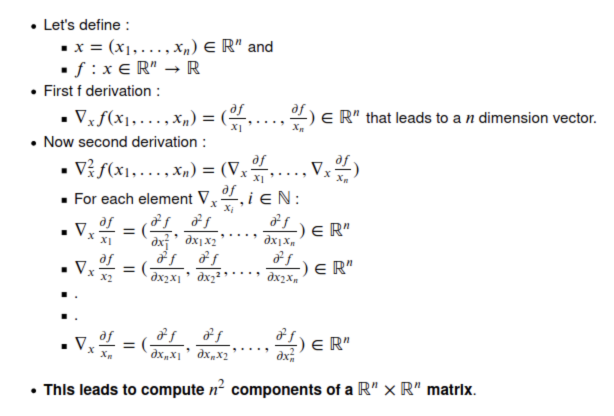

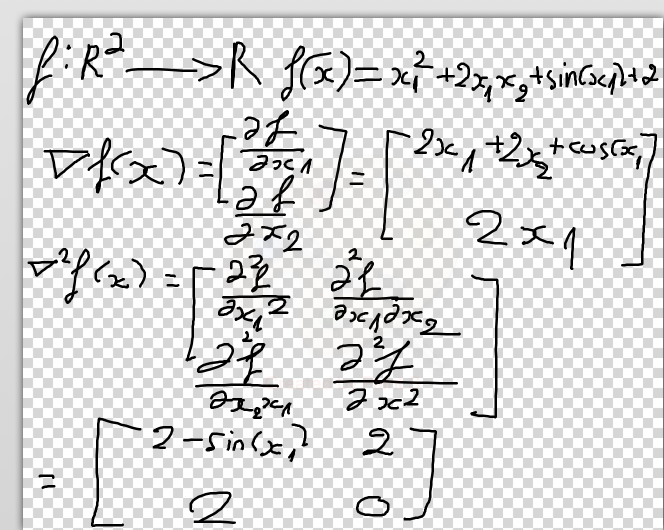

# 3/ In the control flow example where we calculate the derivative of d with respect to a, what would happen if we changed the variable a to a random vector or matrix. At this point, the result of the calculation f(a) is no longer a scalar. What happens to the result? How do we analyze this?

In [20]:
a = tf.Variable(tf.constant([1,2,3], dtype=tf.float32))
print(a)

<tf.Variable 'Variable:0' shape=(3,) dtype=float32, numpy=array([1., 2., 3.], dtype=float32)>


In [21]:
with tf.GradientTape() as t:
  d = f(a)
d_grad = t.gradient(d,a)
print(d_grad)
print()
print(d/a)
print()
print(d_grad == d/a)

tf.Tensor([512. 512. 512.], shape=(3,), dtype=float32)

tf.Tensor([512. 512. 512.], shape=(3,), dtype=float32)

tf.Tensor([ True  True  True], shape=(3,), dtype=bool)


# **Gradient of common functions**

1/ ${f(x} = a^Tx$ => $\nabla_x(a^Tx)=[a_1 a_2 ... a_n]^T = a$

In [22]:
A = tf.Variable(tf.constant([1,2,3,4],dtype=tf.float32))
X = tf.Variable(tf.ones(shape=[4]))

In [23]:
print(A)
print()
print(X)

<tf.Variable 'Variable:0' shape=(4,) dtype=float32, numpy=array([1., 2., 3., 4.], dtype=float32)>

<tf.Variable 'Variable:0' shape=(4,) dtype=float32, numpy=array([1., 1., 1., 1.], dtype=float32)>


In [24]:
tf.tensordot(A, X, axes = 1)

<tf.Tensor: shape=(), dtype=float32, numpy=10.0>

In [25]:
with tf.GradientTape() as t:
  d = tf.tensordot(A, X, axes = 1)
d_grad = t.gradient(d, X)
d_grad

<tf.Tensor: shape=(4,), dtype=float32, numpy=array([1., 2., 3., 4.], dtype=float32)>

In [26]:
d_grad == A

<tf.Tensor: shape=(4,), dtype=bool, numpy=array([ True,  True,  True,  True])>

2/ $f(x) = \mathbf{A}x$. This function returns vector. $\nabla_x
\mathbf{A}x=[a_1^T a_2^T... a_n^T]^T = \mathbf{A^T}$

In [27]:
A = tf.Variable(tf.constant([[1,2,3,4],[5,6,7,8],[9,10,11,12]], dtype=tf.float32))
A

<tf.Variable 'Variable:0' shape=(3, 4) dtype=float32, numpy=
array([[ 1.,  2.,  3.,  4.],
       [ 5.,  6.,  7.,  8.],
       [ 9., 10., 11., 12.]], dtype=float32)>

In [28]:
X = tf.Variable(tf.ones(shape=[4]))
X

<tf.Variable 'Variable:0' shape=(4,) dtype=float32, numpy=array([1., 1., 1., 1.], dtype=float32)>

In [29]:
d_tf = tf.tensordot(A, X, axes = 1)
d_tf

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([10., 26., 42.], dtype=float32)>

In [30]:
d_numpy = A.numpy().dot(X.numpy())
d_numpy

array([10., 26., 42.], dtype=float32)

In [31]:
with tf.GradientTape() as t:
  d = tf.tensordot(A, X, axes = 1)
d_grad = t.jacobian(d, X)

In [32]:
d_grad

<tf.Tensor: shape=(3, 4), dtype=float32, numpy=
array([[ 1.,  2.,  3.,  4.],
       [ 5.,  6.,  7.,  8.],
       [ 9., 10., 11., 12.]], dtype=float32)>

In [33]:
A == d_grad

<tf.Tensor: shape=(3, 4), dtype=bool, numpy=
array([[ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True]])>

5/ Let $f(x) = sin(x)$. Plot $f(x)$ and $\frac{df()x}{dx}$, where the latter is computed without exploiting that $f'(x) = cos(x)$.

In [46]:
x = tf.range(-25, 25, 0.1)
x = tf.Variable(x)

with tf.GradientTape() as t:
  y = tf.math.sin(x)

x_grad = t.gradient(y, x)

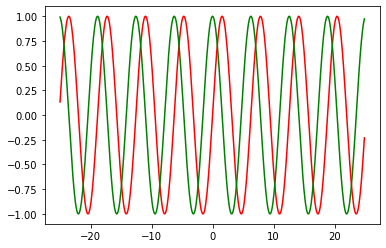

In [48]:
x = tf.range(-25, 25, 0.1)
plt.figure(1)
plt.plot(x, np.sin(x), color='r')
plt.plot(x, x_grad.numpy(), color='g')
plt.show()

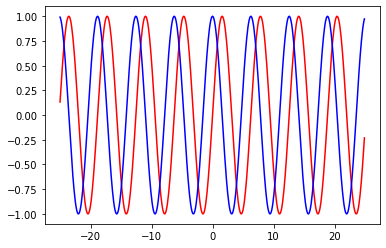

In [49]:
x = tf.range(-25, 25, 0.1)
plt.figure(1)
plt.plot(x, np.sin(x), color='r')
plt.plot(x, np.cos(x), color='b')
plt.show()